In [42]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 200
pd.set_option('Display.max_columns', None)

In [45]:
#Import the cleaned data 
depression = pd.read_csv('../Data/Clean CSV Files//cleaned_depression.csv')
depression.head()

,subreddit,author,domain,timecreated,Post
0,depression,Odd-Creme-8819,self.depression,2022-04-15 19:09:48,are depression meds worth it does anyone here take meds for their depression if so is it worth it i ve seen some pretty nasty statistics side effects saying people taking depression meds can hav...
1,depression,NihilisticDaydreamin,self.depression,2022-04-15 19:09:18,i am pissing my life away and feel powerless to change it i am almost no hope of a girlfriend or wife no social life suck at my job just pissing away time i will probably be in the same boat at ...
2,depression,albataineh,self.depression,2022-04-15 19:04:17,i think about hanging myself everyday before bed i m depressed but i have no intention of killing myself i have problems but i am very grateful of my situation compared to my extended family i wri...
3,depression,Basic-Toe-9979,self.depression,2022-04-15 19:02:25,i need to vent yall ight so heres the thing as far back as i can remember ive always been somewhat depressed and im not the type who uses this term lightly so when i mean depressed i dont mean sad...
4,depression,AbysallNight,self.depression,2022-04-15 18:54:17,i just want to go to sleep and not wake up again you know i feel like my problems are insignificant something worst has happened to others you ve got it easier etc but it wears down on my me...


In [3]:
#Check the shape 
depression.shape

(9536, 5)

In [4]:
twt_depression = pd.read_csv('../Data/cleaned_twt_depression.csv')
twt_depression.head()

,Class,Post
0,Depression,depression continues to be a major health issue there are many ways to treat depression antidepressants and psychotherapy are the usual first line treatments but research has suggested that a med...
1,Depression,read some of the recommendations from the commission for the general community here before the event depression
2,Depression,panel says children should be screened earlier for anxiety and depression
3,Depression,happy happy wednesday everybody have a awesome day alliecowley txtransplant chimissingcases elaineemmerick garyhow billybo ptsd cptsd anxiety panicattack depression nevergiveup godble...
4,Depression,universalcredit edmonton why do i need to attend meetings every week at random times when i m working this is stressing me out cause nothing is never discussed depression anxiety xaviernaidoo


### Checking Most Used Words for Depresion Post

In [5]:
#Create a funtion to get unigrams and bigrams or trigrams

def get_grams(df, col, kind_of_grams = ['uni', 'bi', 'tri']):
    
    if kind_of_grams == 'uni':
        
        #Instiate the CounterVectorizer for unigrams
        cvec = CountVectorizer(stop_words='english', ngram_range=(1, 1))
        #Fit transform 
        post_cvec = cvec.fit_transform(df[col])
        #Convert to a dataframe
        cvec_df = pd.DataFrame(post_cvec.todense(), columns=cvec.get_feature_names())
    
        return cvec_df
    
    elif kind_of_grams == 'bi':
        
        #Instiate the CounterVectorizer for unigrams
        cvec = CountVectorizer(stop_words='english', ngram_range=(2, 2))
        #Fit transform 
        post_cvec = cvec.fit_transform(df[col])
        #Convert to a dataframe
        cvec_df = pd.DataFrame(post_cvec.todense(), columns=cvec.get_feature_names())
        
        return cvec_df
    
    elif kind_of_grams == 'tri':
        
        #Instiate the CounterVectorizer for unigrams
        cvec = CountVectorizer(stop_words='english', ngram_range=(3, 3))
        #Fit transform 
        post_cvec = cvec.fit_transform(df[col])
        #Convert to a dataframe
        cvec_df = pd.DataFrame(post_cvec.todense(), columns=cvec.get_feature_names())
        
        return cvec_df
    
    else:
        return 'The Kind of Unigrams is out of list! Check the function documentation.'

In [6]:
#Create another funtion to plot these grams

def create_barplot(df, col, title, kind, color = 'navy'):
    plt.figure(figsize=(12,7)) #set the figure size
    if kind == 'uni':
        #Calling the funtion for getting unigrams into a dataframe
        unigrams = get_grams(df, col, 'uni') 
        
        #Select top 10 unigrams and Plot these to a barchart
        most_comm_words = unigrams.sum().sort_values(ascending = False).head(10)
        ax = most_comm_words.sort_values().plot(kind = 'barh', color = color)
        
        plt.title(title)
        plt.xlabel('Count of words')
        plt.ylabel(col)
    
    elif kind == 'bi':
        #Calling the funtion for getting bigrams into a dataframe
        bigrams = get_grams(df, col, 'bi') 
        
        #Select top 10 bigrams andPlot these to a barchart
        most_comm_words = bigrams.sum().sort_values(ascending = False).head(10)
        ax = most_comm_words.sort_values().plot(kind = 'barh', color = 'skyblue')
        
        plt.title(title)
        plt.xlabel('Count of words')
        plt.ylabel(col)
        
    elif kind == 'tri':
        #Calling the funtion for getting trigrams into a dataframe
        trigrams = get_grams(df, col, 'tri') 
        
        #Select top 10 bigrams andPlot these to a barchart
        most_comm_words = trigrams.sum().sort_values(ascending = False).head(10)
        ax = most_comm_words.sort_values().plot(kind = 'barh', color = 'red')
        
        plt.title(title)
        plt.xlabel('Count of words')
        plt.ylabel(col)
    else:
        print('Check the funtion to insert the correct parameters!')
        
    #Count the times of word
    for i in ax.patches:
        ax.text(i.get_width(), i.get_y(), i.get_width(), fontsize = 10)

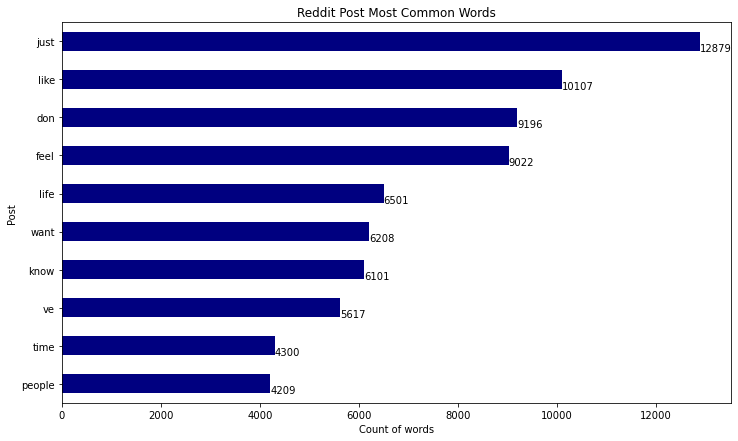

In [7]:
#Checking the most used words for reddit depression posts
create_barplot(depression, 'Post', 'Reddit Post Most Common Words', 'uni')

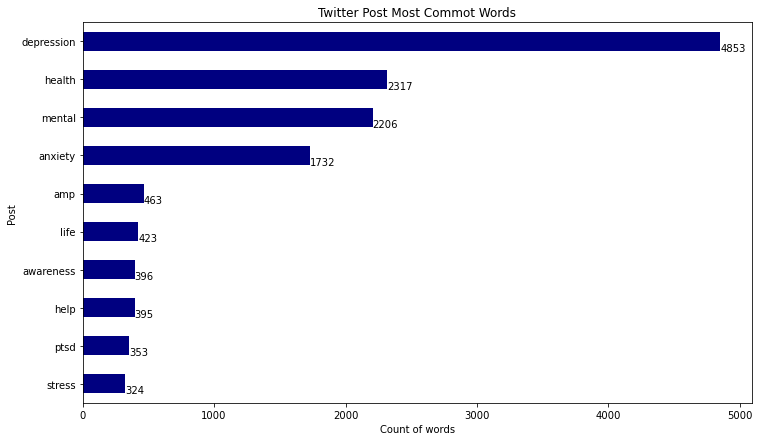

In [12]:
#Checking the most used words for twitter depression posts
create_barplot(twt_depression, 'Post', 'Twitter Post Most Commot Words', 'uni')

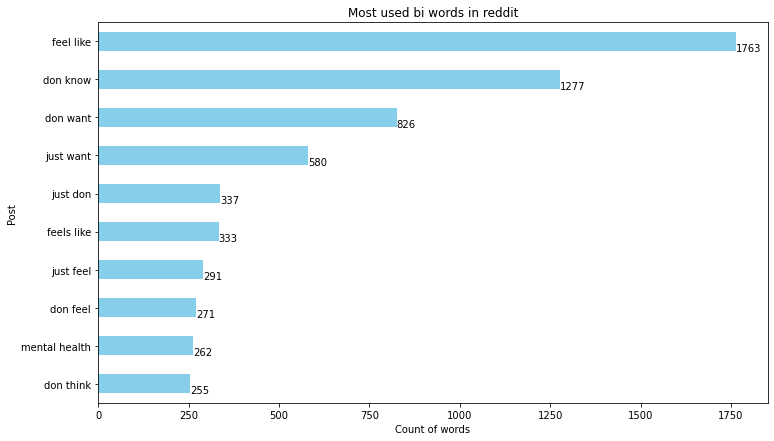

In [17]:
#Cheking the most bi words used in reddit
create_barplot(depression.sample(5000), 'Post', 'Most used bi words in reddit', 'bi')

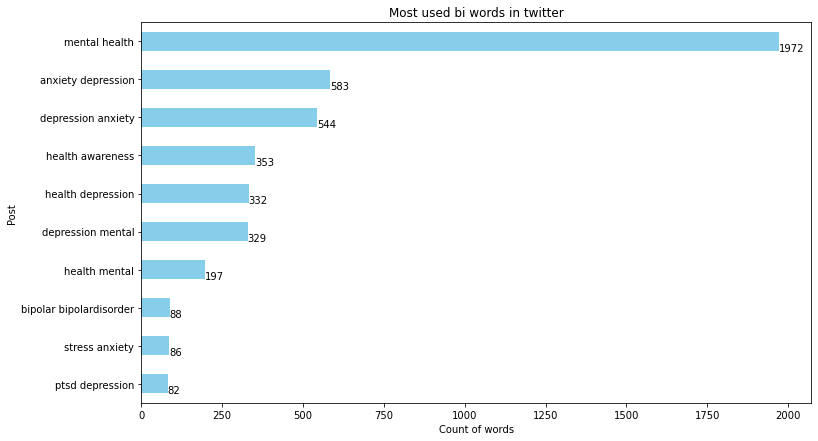

In [18]:
#Cheking the most bi words used in twitter
create_barplot(twt_depression, 'Post', 'Most used bi words in twitter', 'bi')

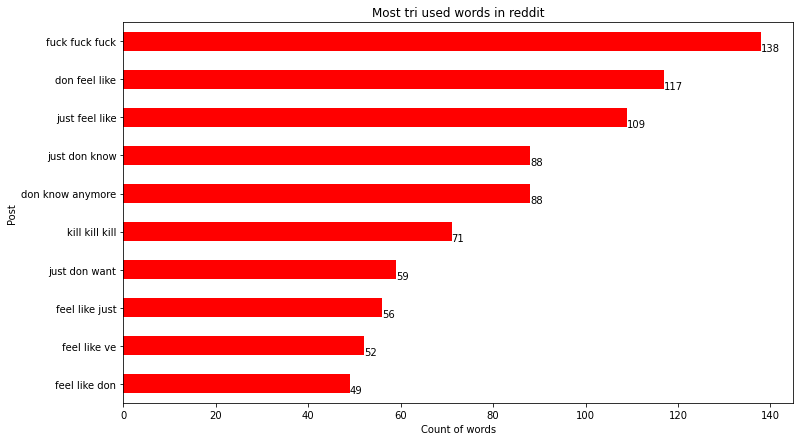

In [20]:
#Cheking the most tri words used in reddit
create_barplot(depression.sample(5000), 'Post', 'Most tri used words in reddit', 'tri')

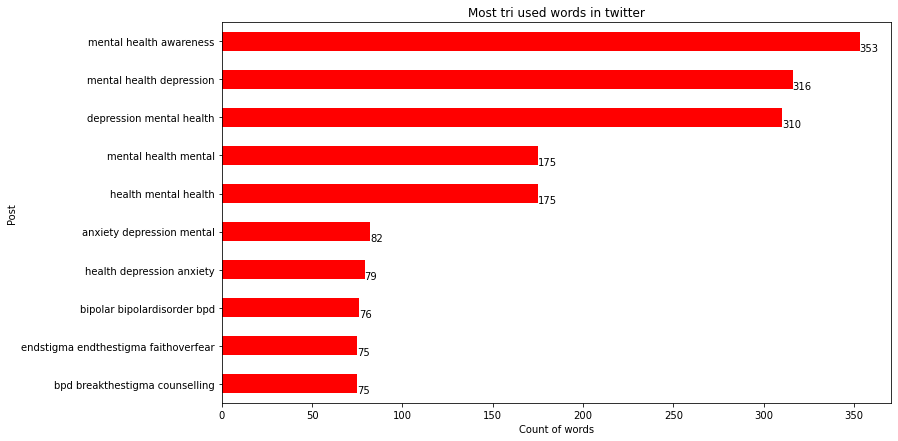

In [21]:
#Cheking the most bi words used in twitter
create_barplot(twt_depression, 'Post', 'Most tri used words in twitter', 'tri')

### Applying sentiment analysis

In [22]:
#Create a funtion to make sentiment dataframe for each corpus

def corpus_sentiment(df):
    sentiment = [] #create a empty list to append the scores of polarity
    sia = SentimentIntensityAnalyzer() # instatiate the sentiment intesity analyzer
    
    for post in df['Post']:
        scores = sia.polarity_scores(post)
        scores['Post'] = post
        sentiment.append(scores)
        
    sentiment_df = pd.DataFrame(sentiment)
    return sentiment_df

In [23]:
#Create the sentiment scores for reddit 
reddit_depression = corpus_sentiment(depression)
reddit_depression.head()

,neg,neu,pos,compound,Post
0,0.155,0.719,0.126,-0.5106,are depression meds worth it does anyone here take meds for their depression if so is it worth it i ve seen some pretty nasty statistics side effects saying people taking depression meds can hav...
1,0.269,0.685,0.046,-0.8932,i am pissing my life away and feel powerless to change it i am almost no hope of a girlfriend or wife no social life suck at my job just pissing away time i will probably be in the same boat at ...
2,0.343,0.623,0.034,-0.9955,i think about hanging myself everyday before bed i m depressed but i have no intention of killing myself i have problems but i am very grateful of my situation compared to my extended family i wri...
3,0.199,0.688,0.113,-0.9934,i need to vent yall ight so heres the thing as far back as i can remember ive always been somewhat depressed and im not the type who uses this term lightly so when i mean depressed i dont mean sad...
4,0.123,0.665,0.212,0.9836,i just want to go to sleep and not wake up again you know i feel like my problems are insignificant something worst has happened to others you ve got it easier etc but it wears down on my me...


In [26]:
#Checking the top 10 most positive sentences
reddit_depression.sort_values(by = 'pos', ascending = False).head(10)

,neg,neu,pos,compound,Post
6348,0.0,0.000,1.000,0.6124,help please
7447,0.0,0.000,1.000,0.3818,dear
3124,0.0,0.000,1.000,0.3400,ha
8958,0.0,0.000,1.000,0.4019,yes
4958,0.0,0.000,1.000,0.2960,yep
585,0.0,0.000,1.000,0.6124,please help
7604,0.0,0.000,1.000,0.0772,i want
7677,0.0,0.114,0.886,0.8316,happiness and love
7289,0.0,0.119,0.881,0.8126,my best friend
2877,0.0,0.156,0.844,0.6597,help for help


In [28]:
#Checking the top 10 most negative sentences
reddit_depression.sort_values(by = 'neg', ascending = False).head(10)

,neg,neu,pos,compound,Post
283,1.0,0.0,0.0,-0.4939,i m miserable
5892,1.0,0.0,0.0,-0.4588,hopeless
3055,1.0,0.0,0.0,-0.5106,a failure
8436,1.0,0.0,0.0,-0.4215,i m struggling
326,1.0,0.0,0.0,-0.1027,idk
4036,1.0,0.0,0.0,-0.4404,i m tired
4426,1.0,0.0,0.0,-0.4404,i m tired
8472,1.0,0.0,0.0,-0.5423,fuck
1003,1.0,0.0,0.0,-0.0772,i m sorry
3990,1.0,0.0,0.0,-0.2500,i m stuck


In [31]:
#Change the label of class to the source of data
reddit_depression['Class'] = 'Reddit'

In [24]:
#Creating the sentiment scores for twitter data
twitter_depression = corpus_sentiment(twt_depression)
twitter_depression.head()

,neg,neu,pos,compound,Post
0,0.206,0.688,0.106,-0.6187,depression continues to be a major health issue there are many ways to treat depression antidepressants and psychotherapy are the usual first line treatments but research has suggested that a med...
1,0.188,0.812,0.000,-0.5719,read some of the recommendations from the commission for the general community here before the event depression
2,0.375,0.625,0.000,-0.6597,panel says children should be screened earlier for anxiety and depression
3,0.169,0.470,0.361,0.7964,happy happy wednesday everybody have a awesome day alliecowley txtransplant chimissingcases elaineemmerick garyhow billybo ptsd cptsd anxiety panicattack depression nevergiveup godble...
4,0.078,0.781,0.141,0.2537,universalcredit edmonton why do i need to attend meetings every week at random times when i m working this is stressing me out cause nothing is never discussed depression anxiety xaviernaidoo


In [29]:
#Checking the top 10 most positive sentences
twitter_depression.sort_values(by = 'pos', ascending = False).head(10)

,neg,neu,pos,compound,Post
2044,0.131,0.283,0.587,0.9169,a daily affirmations to attract money wealth abundance prosperity health love confidence depression motivational wisdom
1157,0.141,0.286,0.573,0.9709,always be positive inspiration happiness positivity meditation hope love faith believeinyourself believe life relax keepcalm depression inspiration mindset mental health depression mental health...
1149,0.090,0.339,0.571,0.9633,be the change drramyamohan capeforhealth inspiration happiness positivity meditation hope love faith believeinyourself inspiration mental health depression mental health awareness drramyamoh...
878,0.063,0.375,0.562,0.9823,be adventurous ignite ur minds amp get out of ur comfortable couches amp enjoy the beauty of the world motivational tuesdayvibe tuesdaymotivaton inspiration happiness love adventure depr...
3247,0.140,0.303,0.557,0.9008,i am way so friendly these days thanks lexapro livelaughlexapro depression happiness rainbows friendly
807,0.088,0.357,0.555,0.9485,i am well rested affirmation affirmations mind positivemindset energy gratitude manifesthealth selfworth kindness unconditional astrology fridaymotivation god entrepreneur healthyliving depressio...
3824,0.081,0.370,0.549,0.9661,i am surrounded by love affirmation affirmations faith wellness happy positivevibesonly god depression mental health lawofattraction faithbasedapparel peace blessed mecfs art unconditional golde...
1673,0.123,0.344,0.534,0.9808,why your brain loves to laugh laughter isn t just fun and games having a good laugh has mental health and physical benefits including improving ur mood and exercising your brain amjoy joy happy...
45,0.088,0.379,0.533,0.9571,wherever i go i find love affirmation affirmations inspiration depression positivevibesonly faith mental health awareness inspire peace positivevibesonly inspiring motivational mindset onwardan...
942,0.219,0.251,0.530,0.8360,helping someone with depression supporting a depressed loved one while taking care of yourself like share comment


In [30]:
#Checking the top 10 most negative sentences
twitter_depression.sort_values(by = 'neg', ascending = False).head(10)

,neg,neu,pos,compound,Post
4036,1.000,0.000,0.00,-0.7351,depression sucks
112,0.910,0.090,0.00,-0.8779,loneliness is a damnation depression
3629,0.881,0.119,0.00,-0.8126,i hate me depression
3112,0.865,0.135,0.00,-0.7506,damn moonknight depression
2321,0.861,0.139,0.00,-0.7351,it sucks depression
1064,0.853,0.147,0.00,-0.9549,so angry lately anger depression tired corruption abused
2903,0.808,0.192,0.00,-0.8910,damn anxiety tonight ugh depression feelliketrash anxiety mentalheath
1165,0.806,0.194,0.00,-0.8074,i m tired of overthinking anxiety depression
2543,0.789,0.211,0.00,-0.9042,imrankhanpti depression is worse than cancer
377,0.789,0.120,0.09,-0.8910,beyond stressed and feeling alone anxiety depression poverty


In [32]:
#Change the label of class to the source of data
twitter_depression['Class'] = 'Twitter'

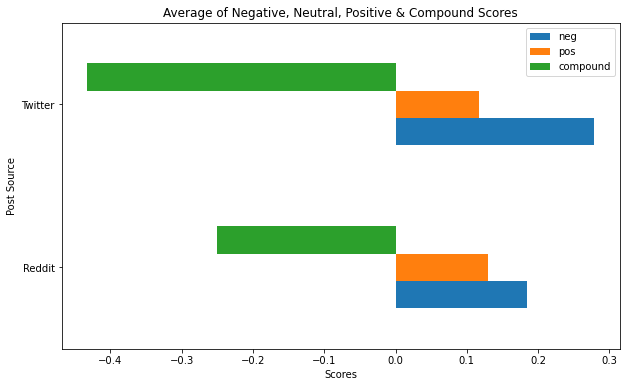

In [36]:
#Combine these dataset and plot the scores in a horizontal barplot
combine_sentiment = pd.concat([reddit_depression, twitter_depression])

combine_sentiment.groupby('Class').mean()[['neg', 'pos', 'compound']].plot(kind = 'barh', figsize = (10,6))
plt.title('Average of Negative, Neutral, Positive & Compound Scores')
plt.xlabel('Scores')
plt.ylabel('Post Source');

In [39]:
#Now the target class will be the depression
combine_sentiment['Class'] = "Depression"

In [47]:
#Export to csv file
combine_sentiment.to_csv('../Data/Sentiment CSV/depression_sentiment.csv', index = False)